In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, rc
import warnings
%matplotlib inline

In [2]:
"""
# 주피터 노트북 한글 설정, x_train, x_test 의 컬럼명을 한글로 주고 싶은데.
rc('Arial')
plt.rcParams['axes.unicode_minus'] = False
"""

"\n# 주피터 노트북 한글 설정, x_train, x_test 의 컬럼명을 한글로 주고 싶은데.\nrc('Arial')\nplt.rcParams['axes.unicode_minus'] = False\n"

In [10]:
data = pd.read_excel("./impact_2_data.xlsx")

In [11]:
data.head()

,date,the_open,the_high,the_low,the_close,the_cnt,usd_kor,nasdaq,high_open,good_bad,...,kosfi_close,kosfi_open,kosfi_high,kosfi_low,kosfi_cnt,kosdaq_close,kosdaq_open,kosdaq_high,kosdaq_low,kosdaq_cnt
0,2015-12-17,10240,10405,9970,10330,946156,1183.06,5002.549805,0.016113,1,...,1977.96,1984.06,1987.83,1967.64,379574,658.11,653.92,658.15,649.44,623235
1,2015-12-18,10230,10710,10165,10710,1841150,1180.43,4923.080078,0.046921,1,...,1975.32,1960.32,1981.42,1958.12,677729,667.45,654.36,667.45,652.98,592660
2,2015-12-21,10695,10825,10670,10720,1274858,1173.61,4968.919922,0.012155,0,...,1981.19,1974.26,1986.66,1968.14,539596,668.65,665.62,669.25,665.53,540199
3,2015-12-22,10740,10750,10450,10495,1374974,1169.11,5001.109863,0.000931,0,...,1992.56,1984.37,1992.72,1971.32,577236,663.42,671.39,671.39,661.52,695147
4,2015-12-23,10535,10635,10415,10425,2532341,1172.16,5045.930176,0.009492,0,...,1999.22,1994.20,2007.42,1989.30,502367,659.60,665.89,665.89,659.58,778688


In [12]:
data = data.dropna()
data.head()

,date,the_open,the_high,the_low,the_close,the_cnt,usd_kor,nasdaq,high_open,good_bad,...,kosfi_close,kosfi_open,kosfi_high,kosfi_low,kosfi_cnt,kosdaq_close,kosdaq_open,kosdaq_high,kosdaq_low,kosdaq_cnt
21,2016-01-20,11575,11675,10970,11280,2597290,1207.25,4471.689941,0.008639,0,...,1845.45,1885.36,1885.36,1830.06,407299,669.68,684.69,685.62,659.72,752779
22,2016-01-21,11310,11515,11065,11340,2540576,1202.07,4472.060059,0.018126,1,...,1840.53,1848.10,1860.02,1838.04,433742,665.84,671.37,673.84,661.23,578091
23,2016-01-22,11450,11530,11180,11450,1703580,1195.57,4591.180176,0.006987,0,...,1879.43,1860.30,1879.43,1859.54,408460,670.95,672.13,673.72,662.81,552167
24,2016-01-25,11550,11750,11485,11740,1909205,1197.36,4518.490234,0.017316,1,...,1893.43,1890.15,1901.22,1882.74,315304,681.43,677.14,681.85,675.24,463152
25,2016-01-26,11670,11750,11600,11655,1471323,1196.78,4567.669922,0.006855,0,...,1871.69,1881.87,1884.13,1862.98,298825,678.85,679.10,682.40,677.29,526894


In [13]:
X = data[["opn_d1", "opn_d5", "opn_d10", "opn_d20",
          "usd_d1", "usd_d5", "usd_d10", "usd_d20",
          "nas_d1", "nas_d5", "nas_d10", "nas_d20",
          "kof_d1", "kof_d5", "kof_d10", "kof_d20",
          "kod_d1", "kod_d5", "kod_d10", "kod_d20",
         ]]
y = data[["good_bad"]]
print(f"X shape:{X.shape}, y shape:{y.shape}")

X shape:(961, 20), y shape:(961, 1)


In [14]:
X.head()

,opn_d1,opn_d5,opn_d10,opn_d20,usd_d1,usd_d5,usd_d10,usd_d20,nas_d1,nas_d5,nas_d10,nas_d20,kof_d1,kof_d5,kof_d10,kof_d20,kod_d1,kod_d5,kod_d10,kod_d20
21,0.005647,0.021263,0.019420,0.047772,-0.002556,-0.003005,0.001584,0.013969,-0.002555,-0.018377,-0.037258,-0.073191,0.002958,-0.002367,-0.007357,-0.025713,0.002152,0.006465,0.006200,0.016379
22,-0.022894,-0.008677,-0.004796,0.017590,0.001244,-0.001310,0.001413,0.014263,-0.001175,-0.010463,-0.029741,-0.069216,-0.019763,-0.020116,-0.024464,-0.043114,-0.019454,-0.015240,-0.013040,-0.005633
23,0.012378,0.001137,0.010146,0.027343,-0.004291,-0.005088,-0.003587,0.008774,0.000083,-0.007994,-0.021934,-0.064746,0.006601,-0.008910,-0.014507,-0.033641,0.001132,-0.012825,-0.009574,-0.004931
24,0.008734,0.014136,0.014359,0.033026,-0.005407,-0.009752,-0.009523,0.002123,0.026637,0.024930,0.008914,-0.034819,0.016046,0.012987,0.002853,-0.014961,0.007454,0.000689,-0.002794,0.002432
25,0.010390,0.016639,0.024988,0.039042,0.001497,-0.005429,-0.007187,0.002511,-0.015833,0.004096,-0.005913,-0.045990,-0.004381,0.004874,-0.001167,-0.016610,0.002895,0.002051,0.000753,0.004497


In [16]:
y.head()

,good_bad
21,0
22,1
23,0
24,1
25,0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2)

In [18]:
import tensorflow as tf
from tensorflow.keras import *
y_train_mlp = np.array(list(map(lambda i: [1,0] if i == 0 else [0,1], y_train)))
y_test_mlp = np.array(list(map(lambda i: [1,0] if i == 0 else [0,1], y_test)))
X_train_mlp = X_train.to_numpy()
X_test_mlp = X_test.to_numpy()

In [19]:
model = models.Sequential([
    layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2,  activation='softmax')
])

In [25]:
model.compile(optimizer = optimizers.Adam(lr=1e-5), metrics=["accuracy"], loss='categorical_crossentropy')

In [38]:
model.fit(X_train_mlp, y_train_mlp, validation_data=(X_test_mlp, y_test_mlp), epochs=1000, batch_size = 10)

Train on 768 samples, validate on 193 samples
Epoch 1/1000
768/768 [==============================] - 0s 499us/sample - loss: 0.5891 - accuracy: 0.6901 - val_loss: 0.7069 - val_accuracy: 0.5751
Epoch 2/1000
768/768 [==============================] - 0s 456us/sample - loss: 0.5891 - accuracy: 0.6901 - val_loss: 0.7071 - val_accuracy: 0.5751
Epoch 3/1000
768/768 [==============================] - 0s 431us/sample - loss: 0.5890 - accuracy: 0.6901 - val_loss: 0.7073 - val_accuracy: 0.5751
Epoch 4/1000
768/768 [==============================] - 0s 444us/sample - loss: 0.5890 - accuracy: 0.6901 - val_loss: 0.7071 - val_accuracy: 0.5751
Epoch 5/1000
768/768 [==============================] - 0s 474us/sample - loss: 0.5890 - accuracy: 0.6901 - val_loss: 0.7071 - val_accuracy: 0.5751
Epoch 6/1000
768/768 [==============================] - 0s 437us/sample - loss: 0.5890 - accuracy: 0.6901 - val_loss: 0.7074 - val_accuracy: 0.5751
Epoch 7/1000
768/768 [==============================] - 0s 490us/s

Epoch 56/1000
768/768 [==============================] - 0s 505us/sample - loss: 0.5883 - accuracy: 0.6901 - val_loss: 0.7077 - val_accuracy: 0.5751
Epoch 57/1000
768/768 [==============================] - 0s 496us/sample - loss: 0.5882 - accuracy: 0.6888 - val_loss: 0.7077 - val_accuracy: 0.5751
Epoch 58/1000
768/768 [==============================] - 0s 462us/sample - loss: 0.5882 - accuracy: 0.6901 - val_loss: 0.7078 - val_accuracy: 0.5751
Epoch 59/1000
768/768 [==============================] - 0s 449us/sample - loss: 0.5882 - accuracy: 0.6901 - val_loss: 0.7077 - val_accuracy: 0.5751
Epoch 60/1000
768/768 [==============================] - 0s 469us/sample - loss: 0.5882 - accuracy: 0.6901 - val_loss: 0.7077 - val_accuracy: 0.5751
Epoch 61/1000
768/768 [==============================] - 0s 498us/sample - loss: 0.5882 - accuracy: 0.6914 - val_loss: 0.7078 - val_accuracy: 0.5751
Epoch 62/1000
768/768 [==============================] - 0s 497us/sample - loss: 0.5882 - accuracy: 0.6914

Epoch 111/1000
768/768 [==============================] - 0s 520us/sample - loss: 0.5877 - accuracy: 0.6888 - val_loss: 0.7083 - val_accuracy: 0.5751
Epoch 112/1000
768/768 [==============================] - 0s 539us/sample - loss: 0.5876 - accuracy: 0.6888 - val_loss: 0.7083 - val_accuracy: 0.5751
Epoch 113/1000
768/768 [==============================] - 0s 529us/sample - loss: 0.5876 - accuracy: 0.6901 - val_loss: 0.7080 - val_accuracy: 0.5751
Epoch 114/1000
768/768 [==============================] - 0s 565us/sample - loss: 0.5876 - accuracy: 0.6914 - val_loss: 0.7082 - val_accuracy: 0.5751
Epoch 115/1000
768/768 [==============================] - 0s 560us/sample - loss: 0.5876 - accuracy: 0.6875 - val_loss: 0.7082 - val_accuracy: 0.5751
Epoch 116/1000
768/768 [==============================] - 0s 564us/sample - loss: 0.5876 - accuracy: 0.6888 - val_loss: 0.7084 - val_accuracy: 0.5751
Epoch 117/1000
768/768 [==============================] - 0s 492us/sample - loss: 0.5876 - accuracy:

768/768 [==============================] - 0s 477us/sample - loss: 0.5870 - accuracy: 0.6927 - val_loss: 0.7087 - val_accuracy: 0.5751
Epoch 166/1000
768/768 [==============================] - 0s 467us/sample - loss: 0.5870 - accuracy: 0.6940 - val_loss: 0.7087 - val_accuracy: 0.5751
Epoch 167/1000
768/768 [==============================] - 0s 497us/sample - loss: 0.5871 - accuracy: 0.6914 - val_loss: 0.7089 - val_accuracy: 0.5751
Epoch 168/1000
768/768 [==============================] - 0s 500us/sample - loss: 0.5869 - accuracy: 0.6914 - val_loss: 0.7088 - val_accuracy: 0.5751
Epoch 169/1000
768/768 [==============================] - 0s 473us/sample - loss: 0.5869 - accuracy: 0.6940 - val_loss: 0.7088 - val_accuracy: 0.5751
Epoch 170/1000
768/768 [==============================] - 0s 448us/sample - loss: 0.5870 - accuracy: 0.6927 - val_loss: 0.7088 - val_accuracy: 0.5751
Epoch 171/1000
768/768 [==============================] - 0s 487us/sample - loss: 0.5869 - accuracy: 0.6927 - val_l

Epoch 220/1000
768/768 [==============================] - 0s 488us/sample - loss: 0.5863 - accuracy: 0.6927 - val_loss: 0.7091 - val_accuracy: 0.5751
Epoch 221/1000
768/768 [==============================] - 0s 499us/sample - loss: 0.5863 - accuracy: 0.6927 - val_loss: 0.7091 - val_accuracy: 0.5751
Epoch 222/1000
768/768 [==============================] - 0s 497us/sample - loss: 0.5863 - accuracy: 0.6940 - val_loss: 0.7093 - val_accuracy: 0.5751
Epoch 223/1000
768/768 [==============================] - 0s 495us/sample - loss: 0.5863 - accuracy: 0.6927 - val_loss: 0.7091 - val_accuracy: 0.5751
Epoch 224/1000
768/768 [==============================] - 0s 430us/sample - loss: 0.5863 - accuracy: 0.6940 - val_loss: 0.7091 - val_accuracy: 0.5751
Epoch 225/1000
768/768 [==============================] - 0s 464us/sample - loss: 0.5863 - accuracy: 0.6940 - val_loss: 0.7091 - val_accuracy: 0.5751
Epoch 226/1000
768/768 [==============================] - 0s 479us/sample - loss: 0.5863 - accuracy:

768/768 [==============================] - 0s 439us/sample - loss: 0.5858 - accuracy: 0.6940 - val_loss: 0.7095 - val_accuracy: 0.5751
Epoch 275/1000
768/768 [==============================] - 0s 501us/sample - loss: 0.5857 - accuracy: 0.6940 - val_loss: 0.7096 - val_accuracy: 0.5751
Epoch 276/1000
768/768 [==============================] - 0s 499us/sample - loss: 0.5857 - accuracy: 0.6940 - val_loss: 0.7096 - val_accuracy: 0.5751
Epoch 277/1000
768/768 [==============================] - 0s 505us/sample - loss: 0.5857 - accuracy: 0.6940 - val_loss: 0.7097 - val_accuracy: 0.5751
Epoch 278/1000
768/768 [==============================] - 0s 487us/sample - loss: 0.5857 - accuracy: 0.6966 - val_loss: 0.7095 - val_accuracy: 0.5751
Epoch 279/1000
768/768 [==============================] - 0s 460us/sample - loss: 0.5857 - accuracy: 0.6940 - val_loss: 0.7096 - val_accuracy: 0.5751
Epoch 280/1000
768/768 [==============================] - 0s 471us/sample - loss: 0.5856 - accuracy: 0.6940 - val_l

Epoch 329/1000
768/768 [==============================] - 0s 478us/sample - loss: 0.5851 - accuracy: 0.6953 - val_loss: 0.7101 - val_accuracy: 0.5751
Epoch 330/1000
768/768 [==============================] - 0s 493us/sample - loss: 0.5851 - accuracy: 0.6953 - val_loss: 0.7100 - val_accuracy: 0.5751
Epoch 331/1000
768/768 [==============================] - 0s 495us/sample - loss: 0.5851 - accuracy: 0.6953 - val_loss: 0.7100 - val_accuracy: 0.5751
Epoch 332/1000
768/768 [==============================] - 0s 500us/sample - loss: 0.5851 - accuracy: 0.6953 - val_loss: 0.7100 - val_accuracy: 0.5751
Epoch 333/1000
768/768 [==============================] - 0s 441us/sample - loss: 0.5850 - accuracy: 0.6953 - val_loss: 0.7100 - val_accuracy: 0.5751
Epoch 334/1000
768/768 [==============================] - 0s 474us/sample - loss: 0.5850 - accuracy: 0.6953 - val_loss: 0.7101 - val_accuracy: 0.5751
Epoch 335/1000
768/768 [==============================] - 0s 471us/sample - loss: 0.5850 - accuracy:

768/768 [==============================] - 0s 505us/sample - loss: 0.5845 - accuracy: 0.6966 - val_loss: 0.7103 - val_accuracy: 0.5751
Epoch 384/1000
768/768 [==============================] - 0s 478us/sample - loss: 0.5844 - accuracy: 0.6966 - val_loss: 0.7105 - val_accuracy: 0.5699
Epoch 385/1000
768/768 [==============================] - 0s 524us/sample - loss: 0.5844 - accuracy: 0.6966 - val_loss: 0.7104 - val_accuracy: 0.5751
Epoch 386/1000
768/768 [==============================] - 0s 504us/sample - loss: 0.5844 - accuracy: 0.6966 - val_loss: 0.7105 - val_accuracy: 0.5699
Epoch 387/1000
768/768 [==============================] - 0s 479us/sample - loss: 0.5844 - accuracy: 0.6966 - val_loss: 0.7106 - val_accuracy: 0.5699
Epoch 388/1000
768/768 [==============================] - 0s 505us/sample - loss: 0.5844 - accuracy: 0.6966 - val_loss: 0.7106 - val_accuracy: 0.5699
Epoch 389/1000
768/768 [==============================] - 0s 513us/sample - loss: 0.5844 - accuracy: 0.6966 - val_l

Epoch 438/1000
768/768 [==============================] - 0s 497us/sample - loss: 0.5838 - accuracy: 0.6966 - val_loss: 0.7108 - val_accuracy: 0.5699
Epoch 439/1000
768/768 [==============================] - 0s 473us/sample - loss: 0.5838 - accuracy: 0.6966 - val_loss: 0.7108 - val_accuracy: 0.5699
Epoch 440/1000
768/768 [==============================] - 0s 488us/sample - loss: 0.5838 - accuracy: 0.6966 - val_loss: 0.7109 - val_accuracy: 0.5699
Epoch 441/1000
768/768 [==============================] - 0s 465us/sample - loss: 0.5838 - accuracy: 0.6966 - val_loss: 0.7110 - val_accuracy: 0.5699
Epoch 442/1000
768/768 [==============================] - 0s 467us/sample - loss: 0.5838 - accuracy: 0.6966 - val_loss: 0.7109 - val_accuracy: 0.5699
Epoch 443/1000
768/768 [==============================] - 0s 468us/sample - loss: 0.5837 - accuracy: 0.6966 - val_loss: 0.7109 - val_accuracy: 0.5699
Epoch 444/1000
768/768 [==============================] - 0s 498us/sample - loss: 0.5838 - accuracy:

768/768 [==============================] - 0s 514us/sample - loss: 0.5832 - accuracy: 0.6992 - val_loss: 0.7112 - val_accuracy: 0.5699
Epoch 493/1000
768/768 [==============================] - 0s 474us/sample - loss: 0.5832 - accuracy: 0.6992 - val_loss: 0.7112 - val_accuracy: 0.5699
Epoch 494/1000
768/768 [==============================] - 0s 471us/sample - loss: 0.5832 - accuracy: 0.6992 - val_loss: 0.7109 - val_accuracy: 0.5699
Epoch 495/1000
768/768 [==============================] - 0s 484us/sample - loss: 0.5832 - accuracy: 0.6992 - val_loss: 0.7112 - val_accuracy: 0.5699
Epoch 496/1000
768/768 [==============================] - 0s 509us/sample - loss: 0.5831 - accuracy: 0.6992 - val_loss: 0.7113 - val_accuracy: 0.5699
Epoch 497/1000
768/768 [==============================] - 0s 570us/sample - loss: 0.5831 - accuracy: 0.6992 - val_loss: 0.7113 - val_accuracy: 0.5699
Epoch 498/1000
768/768 [==============================] - 0s 556us/sample - loss: 0.5831 - accuracy: 0.6992 - val_l

768/768 [==============================] - 0s 473us/sample - loss: 0.5826 - accuracy: 0.7005 - val_loss: 0.7116 - val_accuracy: 0.5699
Epoch 547/1000
768/768 [==============================] - 0s 457us/sample - loss: 0.5826 - accuracy: 0.6992 - val_loss: 0.7116 - val_accuracy: 0.5699
Epoch 548/1000
768/768 [==============================] - 0s 447us/sample - loss: 0.5826 - accuracy: 0.6992 - val_loss: 0.7118 - val_accuracy: 0.5699
Epoch 549/1000
768/768 [==============================] - 0s 454us/sample - loss: 0.5825 - accuracy: 0.6992 - val_loss: 0.7115 - val_accuracy: 0.5699
Epoch 550/1000
768/768 [==============================] - 0s 474us/sample - loss: 0.5825 - accuracy: 0.6992 - val_loss: 0.7115 - val_accuracy: 0.5699
Epoch 551/1000
768/768 [==============================] - 0s 462us/sample - loss: 0.5825 - accuracy: 0.7005 - val_loss: 0.7117 - val_accuracy: 0.5699
Epoch 552/1000
768/768 [==============================] - 0s 471us/sample - loss: 0.5825 - accuracy: 0.7005 - val_l

Epoch 601/1000
768/768 [==============================] - 0s 457us/sample - loss: 0.5819 - accuracy: 0.6992 - val_loss: 0.7119 - val_accuracy: 0.5699
Epoch 602/1000
768/768 [==============================] - 0s 447us/sample - loss: 0.5819 - accuracy: 0.6992 - val_loss: 0.7118 - val_accuracy: 0.5699
Epoch 603/1000
768/768 [==============================] - 0s 432us/sample - loss: 0.5819 - accuracy: 0.7018 - val_loss: 0.7120 - val_accuracy: 0.5699
Epoch 604/1000
768/768 [==============================] - 0s 401us/sample - loss: 0.5819 - accuracy: 0.7005 - val_loss: 0.7120 - val_accuracy: 0.5699
Epoch 605/1000
768/768 [==============================] - 0s 421us/sample - loss: 0.5819 - accuracy: 0.6992 - val_loss: 0.7120 - val_accuracy: 0.5699
Epoch 606/1000
768/768 [==============================] - 0s 443us/sample - loss: 0.5819 - accuracy: 0.6992 - val_loss: 0.7121 - val_accuracy: 0.5699
Epoch 607/1000
768/768 [==============================] - 0s 462us/sample - loss: 0.5818 - accuracy:

768/768 [==============================] - 0s 461us/sample - loss: 0.5813 - accuracy: 0.7031 - val_loss: 0.7124 - val_accuracy: 0.5699
Epoch 656/1000
768/768 [==============================] - 0s 448us/sample - loss: 0.5813 - accuracy: 0.7018 - val_loss: 0.7124 - val_accuracy: 0.5699
Epoch 657/1000
768/768 [==============================] - 0s 427us/sample - loss: 0.5813 - accuracy: 0.7018 - val_loss: 0.7123 - val_accuracy: 0.5699
Epoch 658/1000
768/768 [==============================] - 0s 420us/sample - loss: 0.5813 - accuracy: 0.7018 - val_loss: 0.7124 - val_accuracy: 0.5699
Epoch 659/1000
768/768 [==============================] - 0s 427us/sample - loss: 0.5813 - accuracy: 0.7018 - val_loss: 0.7123 - val_accuracy: 0.5699
Epoch 660/1000
768/768 [==============================] - 0s 453us/sample - loss: 0.5812 - accuracy: 0.7018 - val_loss: 0.7124 - val_accuracy: 0.5699
Epoch 661/1000
768/768 [==============================] - 0s 470us/sample - loss: 0.5812 - accuracy: 0.7018 - val_l

Epoch 710/1000
768/768 [==============================] - 0s 435us/sample - loss: 0.5807 - accuracy: 0.7044 - val_loss: 0.7127 - val_accuracy: 0.5648
Epoch 711/1000
768/768 [==============================] - 0s 428us/sample - loss: 0.5807 - accuracy: 0.7057 - val_loss: 0.7127 - val_accuracy: 0.5648
Epoch 712/1000
768/768 [==============================] - 0s 424us/sample - loss: 0.5806 - accuracy: 0.7044 - val_loss: 0.7127 - val_accuracy: 0.5648
Epoch 713/1000
768/768 [==============================] - 0s 417us/sample - loss: 0.5807 - accuracy: 0.7031 - val_loss: 0.7127 - val_accuracy: 0.5648
Epoch 714/1000
768/768 [==============================] - 0s 456us/sample - loss: 0.5806 - accuracy: 0.7044 - val_loss: 0.7128 - val_accuracy: 0.5648
Epoch 715/1000
768/768 [==============================] - 0s 462us/sample - loss: 0.5806 - accuracy: 0.7031 - val_loss: 0.7127 - val_accuracy: 0.5648
Epoch 716/1000
768/768 [==============================] - 0s 469us/sample - loss: 0.5806 - accuracy:

768/768 [==============================] - 0s 444us/sample - loss: 0.5801 - accuracy: 0.7057 - val_loss: 0.7130 - val_accuracy: 0.5648
Epoch 765/1000
768/768 [==============================] - 0s 422us/sample - loss: 0.5801 - accuracy: 0.7057 - val_loss: 0.7130 - val_accuracy: 0.5648
Epoch 766/1000
768/768 [==============================] - 0s 441us/sample - loss: 0.5800 - accuracy: 0.7057 - val_loss: 0.7130 - val_accuracy: 0.5648
Epoch 767/1000
768/768 [==============================] - 0s 436us/sample - loss: 0.5801 - accuracy: 0.7057 - val_loss: 0.7130 - val_accuracy: 0.5648
Epoch 768/1000
768/768 [==============================] - 0s 437us/sample - loss: 0.5801 - accuracy: 0.7044 - val_loss: 0.7131 - val_accuracy: 0.5648
Epoch 769/1000
768/768 [==============================] - 0s 437us/sample - loss: 0.5800 - accuracy: 0.7044 - val_loss: 0.7131 - val_accuracy: 0.5648
Epoch 770/1000
768/768 [==============================] - 0s 392us/sample - loss: 0.5800 - accuracy: 0.7057 - val_l

Epoch 819/1000
768/768 [==============================] - 0s 449us/sample - loss: 0.5795 - accuracy: 0.7057 - val_loss: 0.7133 - val_accuracy: 0.5648
Epoch 820/1000
768/768 [==============================] - 0s 473us/sample - loss: 0.5795 - accuracy: 0.7070 - val_loss: 0.7135 - val_accuracy: 0.5648
Epoch 821/1000
768/768 [==============================] - 0s 478us/sample - loss: 0.5795 - accuracy: 0.7057 - val_loss: 0.7134 - val_accuracy: 0.5648
Epoch 822/1000
768/768 [==============================] - 0s 496us/sample - loss: 0.5795 - accuracy: 0.7057 - val_loss: 0.7133 - val_accuracy: 0.5648
Epoch 823/1000
768/768 [==============================] - 0s 475us/sample - loss: 0.5794 - accuracy: 0.7070 - val_loss: 0.7134 - val_accuracy: 0.5648
Epoch 824/1000
768/768 [==============================] - 0s 452us/sample - loss: 0.5794 - accuracy: 0.7057 - val_loss: 0.7133 - val_accuracy: 0.5648
Epoch 825/1000
768/768 [==============================] - 0s 462us/sample - loss: 0.5794 - accuracy:

768/768 [==============================] - 0s 454us/sample - loss: 0.5789 - accuracy: 0.7057 - val_loss: 0.7136 - val_accuracy: 0.5648
Epoch 874/1000
768/768 [==============================] - 0s 435us/sample - loss: 0.5789 - accuracy: 0.7057 - val_loss: 0.7137 - val_accuracy: 0.5648
Epoch 875/1000
768/768 [==============================] - 0s 434us/sample - loss: 0.5789 - accuracy: 0.7057 - val_loss: 0.7138 - val_accuracy: 0.5648
Epoch 876/1000
768/768 [==============================] - 0s 443us/sample - loss: 0.5788 - accuracy: 0.7070 - val_loss: 0.7137 - val_accuracy: 0.5648
Epoch 877/1000
768/768 [==============================] - 0s 456us/sample - loss: 0.5789 - accuracy: 0.7057 - val_loss: 0.7137 - val_accuracy: 0.5648
Epoch 878/1000
768/768 [==============================] - 0s 430us/sample - loss: 0.5788 - accuracy: 0.7057 - val_loss: 0.7138 - val_accuracy: 0.5648
Epoch 879/1000
768/768 [==============================] - 0s 405us/sample - loss: 0.5789 - accuracy: 0.7070 - val_l

Epoch 928/1000
768/768 [==============================] - 0s 435us/sample - loss: 0.5783 - accuracy: 0.7070 - val_loss: 0.7139 - val_accuracy: 0.5648
Epoch 929/1000
768/768 [==============================] - 0s 495us/sample - loss: 0.5783 - accuracy: 0.7057 - val_loss: 0.7139 - val_accuracy: 0.5751
Epoch 930/1000
768/768 [==============================] - 0s 479us/sample - loss: 0.5783 - accuracy: 0.7083 - val_loss: 0.7141 - val_accuracy: 0.5648
Epoch 931/1000
768/768 [==============================] - 0s 471us/sample - loss: 0.5782 - accuracy: 0.7057 - val_loss: 0.7140 - val_accuracy: 0.5648
Epoch 932/1000
768/768 [==============================] - 0s 488us/sample - loss: 0.5782 - accuracy: 0.7057 - val_loss: 0.7139 - val_accuracy: 0.5699
Epoch 933/1000
768/768 [==============================] - 0s 471us/sample - loss: 0.5782 - accuracy: 0.7057 - val_loss: 0.7139 - val_accuracy: 0.5751
Epoch 934/1000
768/768 [==============================] - 0s 448us/sample - loss: 0.5782 - accuracy:

768/768 [==============================] - 0s 479us/sample - loss: 0.5777 - accuracy: 0.7083 - val_loss: 0.7143 - val_accuracy: 0.5751
Epoch 983/1000
768/768 [==============================] - 0s 443us/sample - loss: 0.5777 - accuracy: 0.7083 - val_loss: 0.7145 - val_accuracy: 0.5648
Epoch 984/1000
768/768 [==============================] - 0s 417us/sample - loss: 0.5777 - accuracy: 0.7096 - val_loss: 0.7144 - val_accuracy: 0.5699
Epoch 985/1000
768/768 [==============================] - 0s 450us/sample - loss: 0.5777 - accuracy: 0.7096 - val_loss: 0.7143 - val_accuracy: 0.5751
Epoch 986/1000
768/768 [==============================] - 0s 419us/sample - loss: 0.5777 - accuracy: 0.7083 - val_loss: 0.7144 - val_accuracy: 0.5751
Epoch 987/1000
768/768 [==============================] - 0s 445us/sample - loss: 0.5777 - accuracy: 0.7096 - val_loss: 0.7145 - val_accuracy: 0.5699
Epoch 988/1000
768/768 [==============================] - 0s 450us/sample - loss: 0.5777 - accuracy: 0.7096 - val_l

In [28]:
model.predict(X_test_mlp)

array([[0.79481846, 0.2051816 ],
       [0.5855134 , 0.41448656],
       [0.80550313, 0.19449691],
       [0.71896815, 0.2810318 ],
       [0.6200003 , 0.37999967],
       [0.7317148 , 0.2682852 ],
       [0.5401251 , 0.45987487],
       [0.5543849 , 0.4456151 ],
       [0.7523152 , 0.2476848 ],
       [0.8102472 , 0.18975277],
       [0.7333497 , 0.26665032],
       [0.7050599 , 0.29494008],
       [0.22747414, 0.7725259 ],
       [0.8081466 , 0.19185345],
       [0.39894897, 0.601051  ],
       [0.57966375, 0.42033622],
       [0.3028531 , 0.6971469 ],
       [0.7712176 , 0.22878242],
       [0.7585328 , 0.2414672 ],
       [0.4579258 , 0.5420742 ],
       [0.67289376, 0.3271062 ],
       [0.294863  , 0.705137  ],
       [0.81668997, 0.18331006],
       [0.70644534, 0.29355466],
       [0.7087645 , 0.29123548],
       [0.61949784, 0.38050216],
       [0.7255711 , 0.27442893],
       [0.6326075 , 0.3673924 ],
       [0.7029223 , 0.29707772],
       [0.5650177 , 0.43498227],
       [0.

In [30]:
a = np.array([[0.0,0.0,0.0,0.0,0.0,
              0.0,0.0,0.0,0.0,0.0,
              0.0,0.0,0.0,0.0,0.0,
              0.0,0.0,0.0,0.0,0.0,]])
model.predict(a)

array([[0.76044023, 0.23955975]], dtype=float32)

In [18]:
"""
today_columns = ["todaopen_yestopen": 0.0,
                 "todaopen_yesthigh": 0.0, 
                 "yestusd_befousd"  : 0.0, 
                 "yestnasd_befonasd": 0.0 ]
"""

'\ntoday_columns = ["todaopen_yestopen": 0.0,\n                 "todaopen_yesthigh": 0.0, \n                 "yestusd_befousd"  : 0.0, \n                 "yestnasd_befonasd": 0.0 ]\n'

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.591


In [33]:
diabetes_features = [x for i,x in enumerate(X_train.columns) if i!=8]

In [36]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 20
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

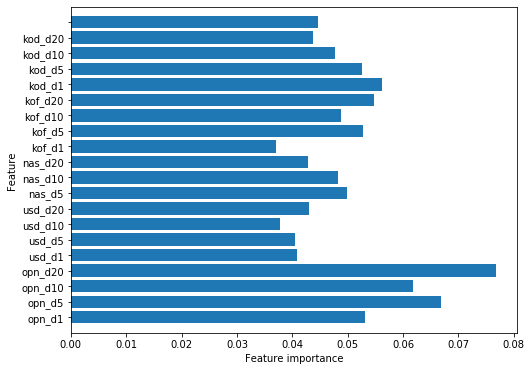

In [37]:
plot_feature_importances_diabetes(rf)